### 01. 정형 데이터마이닝

##### Titanic 데이터는 타이타닉호의 탑승자들의 생존에 관련한 데이터이다. 데이터에 대한 설명은 아래와 같다.

 	
<table>
	<thead>
		<tr>
			<th>변수	데이터</th>
			<th>형태</th>
			<th>설명</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>pclass</td>
			<td>수치형</td>
			<td>1, 2, 3등석 정보를 각각 1, 2, 3으로 저장</td>
		</tr>
		<tr>
			<td>survived</td>
			<td>범주형</td>
			<td>생존 여부(0: 사망, 1: 생존)</td>
		</tr>
		<tr>
			<td>name</td>
			<td>문자형</td>
			<td>이름</td>
		</tr>
		<tr>
			<td>sex</td>
			<td>범주형</td>
			<td>성별</td>
		</tr>
		<tr>
			<td>age</td>
			<td>수치형</td>
			<td>나이</td>
		</tr>
		<tr>
			<td>sibsp</td>
			<td>수치형</td>
			<td>함께 탑승한 형제 또는 배우자의 수</td>
		</tr>
		<tr>
			<td>parch</td>
			<td>수치형</td>
			<td>함께 탑승한 형제 또는 자녀의 수</td>
		</tr>
		<tr>
			<td>ticket</td>
			<td>문자형</td>
			<td>티켓번호</td>
		</tr>
		<tr>
			<td>fare</td>
			<td>수치형</td>
			<td>티켓요금</td>
		</tr>
		<tr>
			<td>cabin</td>
			<td>문자형</td>
			<td>선실번호</td>
		</tr>
		<tr>
			<td>embarked</td>
			<td>범주형</td>
			<td>탑승한 곳(C: Cherbourg, Q: Queenstown, S: Southampton)</td>
		</tr>
	</tbody>
</table>

#### 1. cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸고 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age 변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

<table>
	<thead>
		<tr>
			<th>범주</th>
			<th>범위</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>0</td>
			<td>0 이상 10 미만</td>
		</tr>
		<tr>
			<td>10</td>
			<td>10 이상 20 미만</td>
		</tr>
		<tr>
			<td>20</td>
			<td>20 이상 30 미만</td>
		</tr>
		<tr>
			<td>30</td>
			<td>30 이상 40 미만</td>
		</tr>
		<tr>
			<td>40</td>
			<td>40 이상 50 미만</td>
		</tr>
		<tr>
			<td>50</td>
			<td>50 이상 60 미만</td>
		</tr>
		<tr>
			<td>60</td>
			<td>60 이상 70 미만</td>
		</tr>
		<tr>
			<td>70</td>
			<td>70 이상 80 미만</td>
		</tr>
		<tr>
			<td>80</td>
			<td>80 이상 90 미만</td>
		</tr>
	</tbody>
</table>

In [ ]:
import pandas as pd

df = pd.read_csv("data/모의고사 2회/titanic.csv", encoding="utf-8")

In [ ]:
#cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸시오
# df["cabin"].fillna("NA", inplace=True)
# df["embarked"].fillna("NA", inplace=True)
df

In [ ]:
#수치형 변수가 NA인 값을 중앙값으로 대체
#수치형 변수는 pclass, age, sibsp, parch, fare
for col in ["pclass", "age", "sibsp", "parch", "fare"]:
    print("변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

age_median = df["age"].median()
fare_median = df["fare"].median()

df["age"].fillna(age_median, inplace=True)
df["fare"].fillna(age_median, inplace=True)

age_median = df["age"].median()
fare_median = df["fare"].median()

for col in ["pclass", "age", "sibsp", "parch", "fare"]:
    print("[처리 후] 변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

In [ ]:
#범주형 변수가 NA인 값을 최빈값으로 대체
#범주형 변수는 survived, sex, embarked
for col in ["survived", "sex", "embarked"]:
    print("변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

embarked_mode = df["embarked"].mode()
df["embarked"].fillna(embarked_mode[0], inplace=True)

for col in ["survived", "sex", "embarked"]:
    print("[처리 후] 변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

<table>
	<thead>
		<tr>
			<th>범주</th>
			<th>범위</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>0</td>
			<td>0 이상 10 미만</td>
		</tr>
		<tr>
			<td>10</td>
			<td>10 이상 20 미만</td>
		</tr>
		<tr>
			<td>20</td>
			<td>20 이상 30 미만</td>
		</tr>
		<tr>
			<td>30</td>
			<td>30 이상 40 미만</td>
		</tr>
		<tr>
			<td>40</td>
			<td>40 이상 50 미만</td>
		</tr>
		<tr>
			<td>50</td>
			<td>50 이상 60 미만</td>
		</tr>
		<tr>
			<td>60</td>
			<td>60 이상 70 미만</td>
		</tr>
		<tr>
			<td>70</td>
			<td>70 이상 80 미만</td>
		</tr>
		<tr>
			<td>80</td>
			<td>80 이상 90 미만</td>
		</tr>
	</tbody>
</table>

In [ ]:
#age 변수를 구간화하여 age_1이라는 변수를 생성하고 추가하시오.
df["age_1"] = ""
replace_list = [
    [0, 10, 0],
    [10, 20, 10],
    [20, 30, 20],
    [30, 40, 30],
    [40, 50, 40],
    [50, 60, 50],
    [60, 70, 60],
    [70, 80, 70],
    [80, 90, 80]
]
for item in replace_list:
    df.loc[(df.age >= item[0])&(df.age < item[1]), "age_1"] = item[2]
df

#### 2. 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set_seed(12345)를 실행한 후 데이터를 분할하시오) 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [ ]:
#sex와 embarked는 문자열로 되어 있으므로 변환한다
df["sex_1"] = ""
df["embarked_1"] = ""
df.loc[(df.sex == "male"), "sex_1"] = 1
df.loc[(df.sex == "female"), "sex_1"] = 2

df.loc[(df.embarked == "S"), "embarked_1"] = 1
df.loc[(df.embarked == "C"), "embarked_1"] = 2
df.loc[(df.embarked == "Q"), "embarked_1"] = 3

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["pclass", "sex_1", "sibsp", "parch", "fare", "embarked_1"]]
y = df[["survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=12345)

In [ ]:
#의사결정나무
#참고 : https://datascienceschool.net/03%20machine%20learning/12.01%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

train_accuracy = []
predict_accuracy = []
depth_range = range(3, 10)
for max_depth in depth_range:
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth).fit(X_train, y_train)
    this_train_acc = accuracy_score(y_train, model.predict(X_train))
    this_test_acc = accuracy_score(y_test, model.predict(X_test))
    train_accuracy.append(this_train_acc)
    predict_accuracy.append(this_test_acc)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print("max_depth : {}".format(max_depth))
    print("auc_score : {}".format(roc_score))
    print("train_acc - test_acc : {}".format(this_train_acc - this_test_acc))
    print(classification_report(y_test, model.predict(X_test))+"\n\n")

plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.plot(depth_range, train_accuracy, label="train_accuracy")
plt.plot(depth_range, predict_accuracy, label="predict_accuracy")
plt.legend()
plt.show()

maxima_idx = np.argmax(predict_accuracy)
print("가장 높은 predict_accuracy를 보인 depth : {}".format(depth_range[maxima_idx]))

In [ ]:
#4개 depth를 가진 모델을 가지고 ROC커브로 최적의 threshold를 찾아 정확도를 높여보자.
from sklearn.metrics import roc_curve
model = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc = pd.DataFrame({
    "FPR": fpr, 
    "TPR": tpr, 
    "Threshold": thresholds,
    "TPR-FPR" : tpr-fpr
})
display(roc)
plt.plot(roc["FPR"], roc["TPR"])
maxima = np.argmax(roc["TPR-FPR"])
print("TPR - FPR 최적 threshold값 : {}".format(roc.iloc[maxima, 2]))

In [ ]:
from sklearn.preprocessing import Binarizer

custom_threshold = roc.iloc[maxima, 2]
pred_proba_flatten = model.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_flatten) 
custom_predict = binarizer.transform(pred_proba_flatten)
print("오리지날")
print(classification_report(y_test, model.predict(X_test))+"\n\n")

print("threshold : {}".format(custom_threshold))
print(classification_report(y_test, custom_predict)+"\n\n")

#더 낮아지네???

In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(n_estimators=500, max_depth=4, criterion="entropy", oob_score=True)
model.fit(X_train, y_train["survived"])
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print("oob_score : {}".format(model.oob_score_))
print("train_acc : {}".format(train_acc))
print("test_acc : {}".format(test_acc))
print("auc_score : {}".format(roc_score))
print("train_acc - test_acc : {}".format(this_train_acc - this_test_acc))
print(confusion_matrix(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test), normalize="true"))
print(classification_report(y_test, model.predict(X_test))+"\n\n")

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc = pd.DataFrame({
    "FPR": fpr, 
    "TPR": tpr, 
    "Threshold": thresholds,
    "TPR-FPR" : tpr-fpr
})
display(roc)
plt.plot(roc["FPR"], roc["TPR"])
maxima = np.argmax(roc["TPR-FPR"])
print("TPR - FPR 최적 threshold값 : {}".format(roc.iloc[maxima, 2]))

train_acc : 0.7958515283842795
test_acc : 0.7786259541984732
auc_score : 0.8063707081545064
train_acc - test_acc : 0.08745569296754341
[[196  37]
 [ 50 110]]
[[0.84120172 0.15879828]
 [0.3125     0.6875    ]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       233
           1       0.75      0.69      0.72       160

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.77       393
weighted avg       0.78      0.78      0.78       393





,FPR,TPR,Threshold,TPR-FPR
0,0.000000,0.00000,1.980392,0.000000
1,0.000000,0.00625,0.980392,0.006250
2,0.000000,0.02500,0.939800,0.025000
3,0.000000,0.03750,0.935792,0.037500
4,0.000000,0.08125,0.909285,0.081250
...,...,...,...,...
148,0.969957,1.00000,0.051143,0.030043
149,0.974249,1.00000,0.050970,0.025751
150,0.987124,1.00000,0.041948,0.012876
151,0.991416,1.00000,0.040592,0.008584


TPR - FPR 최적 threshold값 : 0.5911802262114371


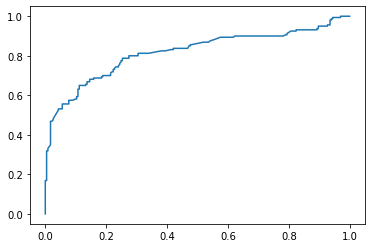

In [92]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train["survived"])

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print("train_acc : {}".format(train_acc))
print("test_acc : {}".format(test_acc))
print("auc_score : {}".format(roc_score))
print("train_acc - test_acc : {}".format(this_train_acc - this_test_acc))
print(confusion_matrix(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test), normalize="true"))
print(classification_report(y_test, model.predict(X_test))+"\n\n")

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc = pd.DataFrame({
    "FPR": fpr, 
    "TPR": tpr, 
    "Threshold": thresholds,
    "TPR-FPR" : tpr-fpr
})
display(roc)
plt.plot(roc["FPR"], roc["TPR"])
maxima = np.argmax(roc["TPR-FPR"])
print("TPR - FPR 최적 threshold값 : {}".format(roc.iloc[maxima, 2]))

train_acc : 0.9093886462882096
test_acc : 0.7964376590330788
auc_score : 0.8063707081545064
train_acc - test_acc : 0.08745569296754341
[[203  30]
 [ 50 110]]
[[0.87124464 0.12875536]
 [0.3125     0.6875    ]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       233
           1       0.79      0.69      0.73       160

    accuracy                           0.80       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.80      0.80      0.79       393





,FPR,TPR,Threshold,TPR-FPR
0,0.000000,0.00000,1.999837,0.000000
1,0.000000,0.00625,0.999837,0.006250
2,0.000000,0.03125,0.999071,0.031250
3,0.000000,0.04375,0.998754,0.043750
4,0.000000,0.07500,0.995758,0.075000
...,...,...,...,...
141,0.965665,1.00000,0.004829,0.034335
142,0.978541,1.00000,0.004406,0.021459
143,0.987124,1.00000,0.004017,0.012876
144,0.995708,1.00000,0.001830,0.004292


TPR - FPR 최적 threshold값 : 0.4409485474638402


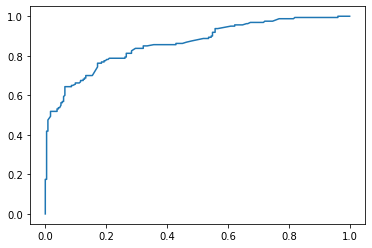

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500)
model.fit(X_train, y_train["survived"])

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print("train_acc : {}".format(train_acc))
print("test_acc : {}".format(test_acc))
print("auc_score : {}".format(roc_score))
print("train_acc - test_acc : {}".format(this_train_acc - this_test_acc))
print(confusion_matrix(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test), normalize="true"))
print(classification_report(y_test, model.predict(X_test))+"\n\n")

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc = pd.DataFrame({
    "FPR": fpr, 
    "TPR": tpr, 
    "Threshold": thresholds,
    "TPR-FPR" : tpr-fpr
})
display(roc)
plt.plot(roc["FPR"], roc["TPR"])
maxima = np.argmax(roc["TPR-FPR"])
print("TPR - FPR 최적 threshold값 : {}".format(roc.iloc[maxima, 2]))